### Business case:-On the basis of given parameters(features) our target is to predict the flight fare
### So we are solving a regression task.

In [5]:
# Importing neccessary libraries
import numpy as np, pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("Flight_Fare.xlsx")

In [18]:
print(df.columns)

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


### Features:
- __Airline__: This feature will have all the types of airlines.
- __Date_of_Journey__: This feature will let us know about the date on which the passenger's journey will start.
- __Source__: This feature holds the name of the place from where the passenger's journey will start.
- __Destination__: This feature holds the name of the destination to where passengers wanted to travel.
- __Route__: Here we can know about that what is the route through which passengers have opted to travel from his/her source to their destination.
- __Arrival_Time__: Arrival time is when the passenger will reach his/her destination.
- __Duration__: Duration is the whole period that a flight will take to complete its journey from source to destination.
- __Total_Stops__: This will let us know in how many places flights will stop there for the flight in the whole journey.
- __Additional_Info__: In this feature, we will get information about food, kind of food, and other amenities.
- __Price__: Price of the flight for a complete journey including all the expenses before onboarding. 

***
#### Basic Checks
***

In [7]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


- __From the above, we can observe that there are 10683 total no. of rows__

In [13]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [15]:
df.describe(include="O")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [19]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

- __From the above, there are two features with 1 null values each : "Route" & Total_Stops__

***
#### EDA
***

In [22]:
# Since there are no numerical columns, so we are proceeding with finding 
# relationship between all categorical columns with the target

In [46]:
# Checking the unique categories:
categorical_columns = df.iloc[:,:-1].columns

for cat in categorical_columns:
    print(f"No. of unique categories in {cat} features is: {len(df[cat].unique())}")

No. of unique categories in Airline features is: 12
No. of unique categories in Date_of_Journey features is: 44
No. of unique categories in Source features is: 5
No. of unique categories in Destination features is: 6
No. of unique categories in Route features is: 129
No. of unique categories in Dep_Time features is: 222
No. of unique categories in Arrival_Time features is: 1343
No. of unique categories in Duration features is: 368
No. of unique categories in Total_Stops features is: 6
No. of unique categories in Additional_Info features is: 10


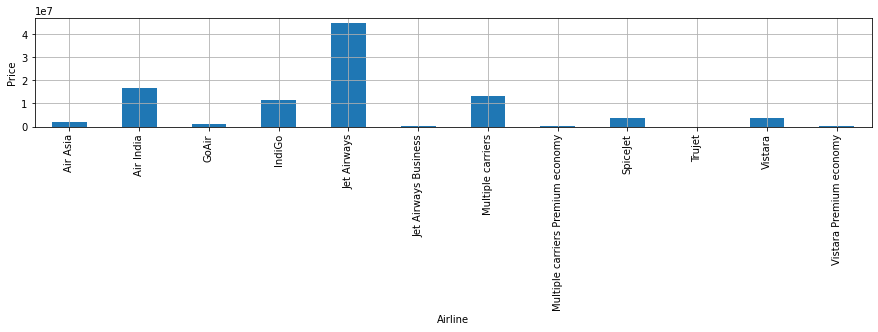

In [85]:
# Relationship between Airline & Price:

plt.figure(figsize=(15,2))
df.groupby("Airline")["Price"].sum().plot(kind = "bar")
plt.ylabel("Price")
plt.grid()
plt.show()

- __From the above plot, we can observe that Jet Airways has the maximum price compared to the others__

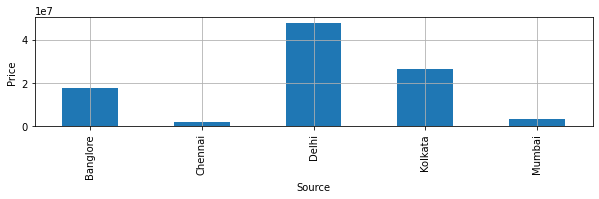

In [89]:
# Source with price:

plt.figure(figsize=(10,2))
df.groupby("Source")["Price"].sum().plot(kind = "bar")
plt.ylabel("Price")
plt.grid()
plt.show()

- __From the above plot, we can observe that the flight goes to Delhi has the maximum price compared to the others__

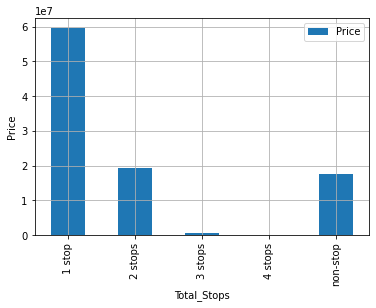

In [117]:
# Total_Stops:

df.groupby("Total_Stops").sum().plot(kind = "bar")
plt.ylabel("Price")
plt.grid()
plt.show()

- __From the above plot, we can observe that the flight 1 stops has the maximum price compared to the others__

In [86]:
categorical_columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')